In [2]:
import pycocotools.coco as coco
import os

In [3]:
datadir = 'D:\Paralaxiom Tutorials\dataset_analysis\\annotations'
dataFile = 'instances_val2017.json'
coco = coco.COCO(os.path.join(datadir, dataFile))

loading annotations into memory...
Done (t=1.04s)
creating index...
index created!


In [5]:
coco.dataset.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [6]:
coco.dataset['info']

{'description': 'COCO 2017 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2017,
 'contributor': 'COCO Consortium',
 'date_created': '2017/09/01'}

In [7]:
coco.dataset['licenses']

[{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/',
  'id': 1,
  'name': 'Attribution-NonCommercial-ShareAlike License'},
 {'url': 'http://creativecommons.org/licenses/by-nc/2.0/',
  'id': 2,
  'name': 'Attribution-NonCommercial License'},
 {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/',
  'id': 3,
  'name': 'Attribution-NonCommercial-NoDerivs License'},
 {'url': 'http://creativecommons.org/licenses/by/2.0/',
  'id': 4,
  'name': 'Attribution License'},
 {'url': 'http://creativecommons.org/licenses/by-sa/2.0/',
  'id': 5,
  'name': 'Attribution-ShareAlike License'},
 {'url': 'http://creativecommons.org/licenses/by-nd/2.0/',
  'id': 6,
  'name': 'Attribution-NoDerivs License'},
 {'url': 'http://flickr.com/commons/usage/',
  'id': 7,
  'name': 'No known copyright restrictions'},
 {'url': 'http://www.usa.gov/copyright.shtml',
  'id': 8,
  'name': 'United States Government Work'}]

In [8]:
coco.dataset['images'][0:10]

[{'license': 4,
  'file_name': '000000397133.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
  'height': 427,
  'width': 640,
  'date_captured': '2013-11-14 17:02:52',
  'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
  'id': 397133},
 {'license': 1,
  'file_name': '000000037777.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000037777.jpg',
  'height': 230,
  'width': 352,
  'date_captured': '2013-11-14 20:55:31',
  'flickr_url': 'http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg',
  'id': 37777},
 {'license': 4,
  'file_name': '000000252219.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000252219.jpg',
  'height': 428,
  'width': 640,
  'date_captured': '2013-11-14 22:32:02',
  'flickr_url': 'http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg',
  'id': 252219},
 {'license': 1,
  'file_name': '000000087038.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000

In [9]:
coco.dataset['annotations'][0]['']

KeyError: ''

In [10]:
for i, k in enumerate(coco.dataset['categories']):
    print(i, k['name'])

0 person
1 bicycle
2 car
3 motorcycle
4 airplane
5 bus
6 train
7 truck
8 boat
9 traffic light
10 fire hydrant
11 stop sign
12 parking meter
13 bench
14 bird
15 cat
16 dog
17 horse
18 sheep
19 cow
20 elephant
21 bear
22 zebra
23 giraffe
24 backpack
25 umbrella
26 handbag
27 tie
28 suitcase
29 frisbee
30 skis
31 snowboard
32 sports ball
33 kite
34 baseball bat
35 baseball glove
36 skateboard
37 surfboard
38 tennis racket
39 bottle
40 wine glass
41 cup
42 fork
43 knife
44 spoon
45 bowl
46 banana
47 apple
48 sandwich
49 orange
50 broccoli
51 carrot
52 hot dog
53 pizza
54 donut
55 cake
56 chair
57 couch
58 potted plant
59 bed
60 dining table
61 toilet
62 tv
63 laptop
64 mouse
65 remote
66 keyboard
67 cell phone
68 microwave
69 oven
70 toaster
71 sink
72 refrigerator
73 book
74 clock
75 vase
76 scissors
77 teddy bear
78 hair drier
79 toothbrush


In [12]:
type(coco.dataset['annotations'][0]['bbox'])

list

In [11]:
len(coco.dataset['annotations']) # 36781
coco.dataset['annotations'][0].keys() # dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])


[126.74, 240.09, 109.25, 87.4]

In [13]:
coco.createIndex()

creating index...
index created!


In [7]:
categories = coco.loadCats(coco.getCatIds())
categoryNames = [cat['name'] for cat in categories]
supercategoryNames = set(cat['supercategory'] for cat in categories)


In [6]:
categoryImagesDict = dict()

for catName in categoryNames:
    categoryImagesDict[catName] = coco.getImgIds(catIds = coco.getCatIds(catNms = [catName]))

In [22]:
from Analysis.CocoAnalysis import Dataset
import matplotlib.pyplot as plt

In [23]:
dataset = Dataset('D:\\Paralaxiom Tutorials\\dataset_analysis\\annotations\\instances_val2017.json')
    
print('The Dataset has {} categorie(s)'.format(len(dataset.getCategoryNames())))

print('The dataset has {} supercategorie(s)'.format(len(dataset.getSuperCategoryNames())))

minBbox, maxBbox = dataset.getMinMaxBBox()
print('In dataset, this is the min count of bbox in any image : {}, this is the max count of bbox in any image : {}'.format(minBbox, maxBbox))


loading annotations into memory...
Done (t=0.72s)
creating index...
index created!
The Dataset has 80 categorie(s)
The dataset has 12 supercategorie(s)
In dataset, this is the min count of bbox in any image : 1, this is the max count of bbox in any image : 63


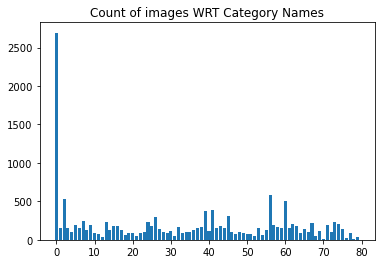

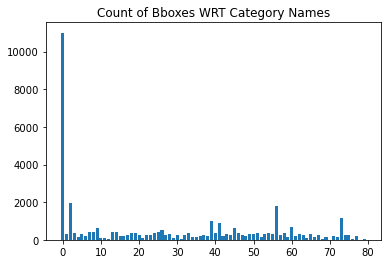

In [3]:
names = dataset.getCategoryImagesDict().keys()
values = [len(value) for value in dataset.getCategoryImagesDict().values()]

plt.figure(5)
plt.bar(range(len(names)), values)
plt.title(label = 'Count of images WRT Category Names')
plt.show()

names = dataset.getCatToNoBbox().keys()
values = dataset.getCatToNoBbox().values()

plt.figure(5)
plt.bar(range(len(names)), values)
plt.title(label = 'Count of Bboxes WRT Category Names')
plt.show()


In [4]:
print(dataset.getCatMinMaxArea())

{'person': (4.0040000000000004, 373562.64149999997), 'bicycle': (61.837199999999996, 300794.176), 'car': (13.935899999999998, 299222.4), 'motorcycle': (15.323, 310143.43200000003), 'airplane': (41.533, 240609.76919999998), 'bus': (15.406999999999998, 301687.67199999996), 'train': (713.8291999999999, 409094.4), 'truck': (102.8016, 300292.8), 'boat': (6.772499999999999, 268801.7934), 'traffic light': (2.5134, 78980.0616), 'fire hydrant': (24.241999999999997, 228779.01279999997), 'stop sign': (32.8252, 206706.3309), 'parking meter': (34.1515, 97150.284), 'bench': (32.589, 297443.4633), 'bird': (3.396, 234146), 'cat': (775.086, 351086.839), 'dog': (17.304, 338032.227), 'horse': (20.6264, 185745.33879999997), 'sheep': (25.137, 302547.7876), 'cow': (14.7074, 280247.9316), 'elephant': (212.23559999999998, 305602), 'bear': (442.34979999999996, 329662.40580000007), 'zebra': (265.3828, 270478.0008), 'giraffe': (51.80159999999999, 284476.388), 'backpack': (13.5228, 98515.7226), 'umbrella': (4.787

In [16]:
from Converter import CocoToYoloConverter
YoloDataset = CocoToYoloConverter.CocoToYoloConverter('D:\\Paralaxiom Tutorials\\dataset_analysis\\annotations\\instances_val2017.json')

loading annotations into memory...
Done (t=1.00s)
creating index...
index created!
Making up the yolo dataset directory at location d:\Paralaxiom Tutorials\dataset_analysis/CocoYoloDataset/


In [17]:
YoloDataset.createLabelFile()

In [18]:
import cv2
import matplotlib.pyplot  as plt

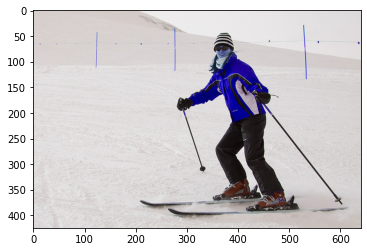

In [19]:
img = cv2.imread('D:\\Paralaxiom Tutorials\\dataset_analysis\\coco_road\\images\\train\\000000000785.jpg')

plt.imshow(img)

In [4]:
import random
import cv2
import matplotlib.pyplot  as plt
import pycocotools.coco as coco

def plotImagesCoco(path , jsonFile = 'train.json'):
    '''
        path : path to the image directory
        jsonFile : json Path
    '''
    cocoDataset = coco.COCO( jsonFile)
    imgs = random.sample(cocoDataset.dataset['images'], 1)
    imgidDict = {img['id'] : img for img in imgs}
    imgtoannDict = {id: cocoDataset.loadAnns(cocoDataset.getAnnIds(imgIds = id)) for id in imgidDict.keys()}
    # print(imgtoannDict)
    for id in imgtoannDict.keys():
        print(len(imgtoannDict[id]))
        print(os.path.join(path, imgidDict[id]['file_name']))
        img = cv2.imread(os.path.join(path, imgidDict[id]['file_name']))
        print(img.shape)
        print(type(img))
        for ann in imgtoannDict[id]:
            bbox = ann['bbox']
            category = cocoDataset.loadCats(cocoDataset.getCatIds(catIds = [ann['category_id']]))[0]['name']
            cv2.rectangle(img, pt1 = (int(bbox[0]), int(bbox[1])) , pt2 = (int(bbox[0]+bbox[2]), int(bbox[1]+bbox[3])), color = (0,255,0), thickness = 2)
            cv2.putText(img ,category, (int(bbox[0]+bbox[2]+10),int(bbox[1]+bbox[3])) ,0, 0.5, (255,0,0) )
        plt.figure(figsize=(10,10))
        plt.imshow( img)

        

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
3
D:\Paralaxiom Tutorials\dataset_analysis\coco_road\images\train\000000181666.jpg
(425, 640, 3)
<class 'numpy.ndarray'>


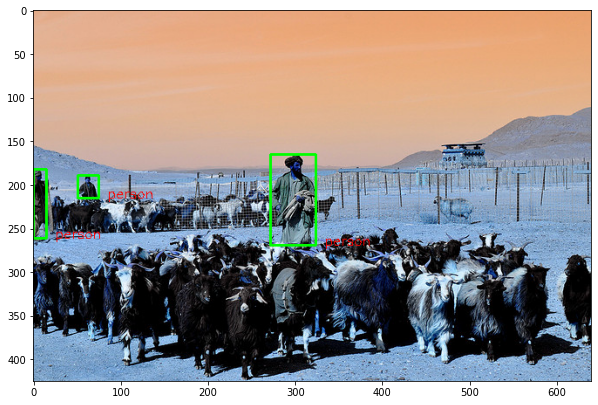

In [29]:
plotImagesCoco(path = 'D:\\Paralaxiom Tutorials\\dataset_analysis\\coco_road\\images\\train', jsonFile = 'D:\\Paralaxiom Tutorials\\dataset_analysis\\coco_road\\train.json')

In [11]:
from Converter import CocoToYoloConverter
YoloDataset = CocoToYoloConverter.CocoToYoloConverter(jsonpath = 'D:\\Paralaxiom Tutorials\\dataset_analysis\\coco_road\\train.json', imagePath = 'D:\\Paralaxiom Tutorials\\dataset_analysis\\coco_road\\images\\train', yoloPath="/coco_road/YoloDataset/", height=600, width=600)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Making up the yolo dataset directory at location d:\Paralaxiom Tutorials\dataset_analysis/coco_road/YoloDataset/


In [12]:
def plotImagesYolo(path = 'D:\\Paralaxiom Tutorials\\dataset_analysis\\coco_road\\YoloDataset', imagePath = 'D:\\Paralaxiom Tutorials\\dataset_analysis\\coco_road\\images\\train'):
    '''
        path : path to the directory
        jsonFile : json file name(exclude .json)
    '''
    imgPaths = random.sample(os.listdir(imagePath), 1)
    annotations = os.path.join(path, 'annotations')
    with open(os.path.join(path, 'labels.txt'), 'r') as f:
        labels = f.read().split('\n')
    print(labels)
    
    for iPath in imgPaths:
        img = cv2.imread(os.path.join(imagePath, iPath))
        print(img.shape)
        anns = []
        
        with open(os.path.join(annotations, iPath.split('.')[0]+'.txt'), 'r') as f:
            anns = f.read().split('\n')
            anns = [a.split(' ') for a in anns if len(a.split(' ')) == 5]
        
        for ann in anns:
            bbox = [ float(a) for a in ann[1:]]
            start_pt = int(bbox[0]), int(bbox[1])
            end_pt = int(bbox[0]+bbox[2]), int(bbox[1]+bbox[3])
            category = labels[int(ann[0])]
            cv2.rectangle(img, pt1 =  start_pt, pt2 = end_pt, color = (0,255,0), thickness = 2)
            cv2.putText(img ,category, (int(bbox[0]+bbox[2]+10),int(bbox[1]+bbox[3])) ,0, 0.5, (255,0,0) )
        plt.figure(figsize=(10,10))
        plt.imshow( img)
        

['person', 'car', 'scooter', '']
(600, 600, 3)


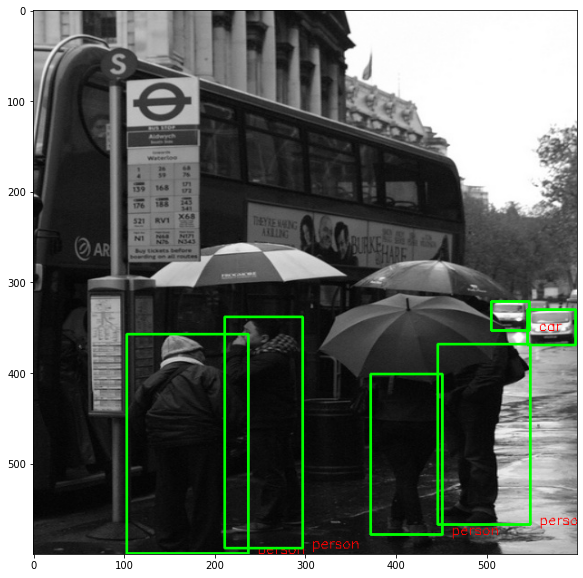

In [25]:
plotImagesYolo(imagePath='D:\\Paralaxiom Tutorials\\dataset_analysis\\coco_road\\YoloDataset\\images')

['Pedestrian', 'Truck', 'Car', 'Cyclist', 'DontCare', 'Misc', 'Van', 'Tram', 'Person_sitting', '']
(375, 1242, 3)


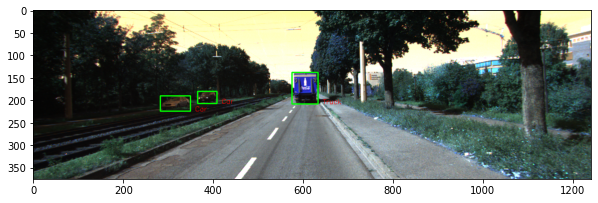

In [32]:
plotImagesYolo(path = 'D:\\Paralaxiom Tutorials\\dataset_analysis\\yoloDataset', imagePath = 'D:\\Dataset\\data_object_image_2\\training\\image_2')


In [3]:
def plotImagesKiiti(path = 'D:\\Paralaxiom Tutorials\\dataset_analysis\\training\\label_2', imagePath = 'D:\\Dataset\\data_object_image_2\\training\\image_2'):
    
    imgPaths = random.sample(os.listdir(imagePath), 1)
    # imgPaths = os.listdir(imagePath)
    # annotations = os.path.join(path, 'annotations')
    # with open(os.path.join(path, 'labels.txt'), 'r') as f:
    #     labels = f.read().split('\n')
    # print(labels)
    
    for iPath in imgPaths[0:1]:
        img = cv2.imread(os.path.join(imagePath, iPath))
        print(img.shape)
        anns = []
        with open(os.path.join(path, iPath.split('.')[0]+'.txt'), 'r') as f:
            anns = f.read().split('\n')
            anns = [a.split(' ') for a in anns if len(a.split(' ')) == 15]
        
        for ann in anns:
            bbox = [ float(a) for a in ann[4:8]]
            start_pt = int(bbox[0]), int(bbox[1])
            end_pt = int(bbox[2]), int(bbox[3])
            category = ann[0]
            cv2.rectangle(img, pt1 =  start_pt, pt2 = end_pt, color = (0,255,0), thickness = 2)
            cv2.putText(img ,category, (int(bbox[2]+10),int(bbox[3])) ,0, 0.5, (255,0,0) )
        plt.figure(figsize=(10,10))
        plt.imshow( img)

(375, 1242, 3)


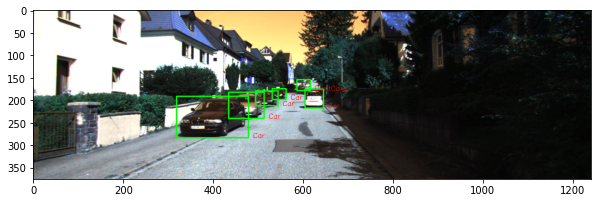

In [31]:
plotImagesKiiti()

loading annotations into memory...
Done (t=0.78s)
creating index...
index created!
2
D:\Dataset\data_object_image_2\training\image_2\002550.png
(375, 1242, 3)
<class 'numpy.ndarray'>


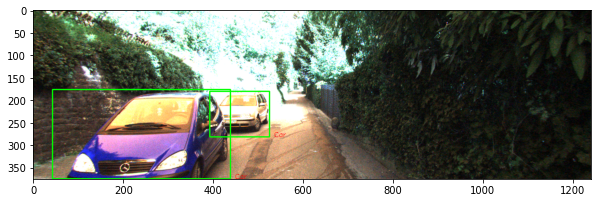

In [32]:
plotImagesCoco(path = 'D:\\Dataset\\data_object_image_2\\training\\image_2', jsonFile = 'D:\\Paralaxiom Tutorials\\dataset_analysis\\KittiInCoco.json')

In [1]:
import random
from Converter import CocoToKittiConverter

KtDataset = CocoToKittiConverter.CocoToKittiConverter('D:\\Paralaxiom Tutorials\\dataset_analysis\\coco_road\\train.json', imagePath = 'D:\\Paralaxiom Tutorials\\dataset_analysis\\coco_road\\images\\train', kittiPath="\\coco_road\\KittiDataset\\", height=600, width=600)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
kitti dataset directory location d:\Paralaxiom Tutorials\dataset_analysis\coco_road\KittiDataset\
Making up the kitti dataset directory at location d:\Paralaxiom Tutorials\dataset_analysis\coco_road\KittiDataset\
Making up the kitti dataset annotation directory at location d:\Paralaxiom Tutorials\dataset_analysis\coco_road\KittiDataset\\annotations\
Making up the kitti dataset images directory at location d:\Paralaxiom Tutorials\dataset_analysis\coco_road\KittiDataset\\images\


(600, 600, 3)


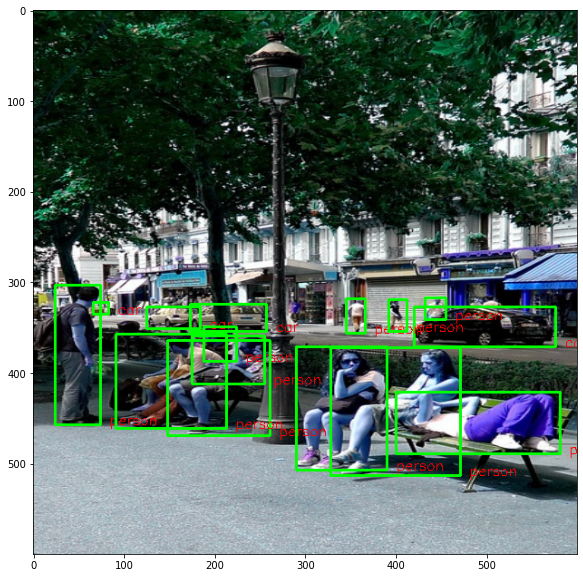

In [18]:
import matplotlib.pyplot as plt 
import cv2
plotImagesKiiti(path = 'D:\\Paralaxiom Tutorials\\dataset_analysis\\coco_road\\KittiDataset\\annotations', imagePath = 'D:\\Paralaxiom Tutorials\\dataset_analysis\\coco_road\\KittiDataset\\images')